In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

## Construct the transfer matrix at temperature $T$ with external field $B$

In [2]:
J = 1.0
kB = 1.0

In [3]:
def trans_matrix(T, B):
    beta = 1 / (kB * T)
    T_max = np.array([[np.exp(beta * J + beta * B), np.exp(-beta * J)],
                      [np.exp(-beta * J), np.exp(beta * J - beta * B)]]
                    )
    return T_max

t = trans_matrix(30, 10)
print("The transfer matrix is :\n", t)

The transfer matrix is :
 [[1.44291687 0.9672161 ]
 [0.9672161  0.74081822]]


## Find the eivenvalues of the transfer matrix and compare to the exact results.

In [4]:
def eigenvalues_exact(T, B):
    return np.linalg.eigvalsh(trans_matrix(T, B))

def eigenvalues(T, B):
    beta = 1 / (kB * T)
    lamda1 = np.exp(beta * J) * (np.cosh(beta * B) - np.sqrt((np.sinh(beta * B)**2) + np.exp(-4 * beta * J)))
    lamda2 = np.exp(beta * J) * (np.cosh(beta * B) + np.sqrt((np.sinh(beta * B)**2) + np.exp(-4 * beta * J)))
    return np.array([lamda1,lamda2])
 
print("Calculate ans :", eigenvalues(30, 10), "\nExact ans :", eigenvalues_exact(30, 10))
print("\nThe difference are :\n", eigenvalues(30, 10) - eigenvalues_exact(30, 10))

Calculate ans : [0.06291535 2.12081974] 
Exact ans : [0.06291535 2.12081974]

The difference are :
 [0.0000000e+00 4.4408921e-16]


## Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.

In [5]:
def partition_exact(T, B, N):
    a = trans_matrix(T, B)
    b = np.copy(a)
    for i in range(N - 1):
        a = np.dot(a, b)
    return np.trace(a)

def partition(T, B, N):
    beta = 1 / (kB * T)
    lamda_ = np.exp(beta * J) * (np.cosh(beta * B) + np.sqrt((np.sinh(beta * B)**2) + np.exp(-4 * beta * J)))
    return lamda_**N

print("N = 5")
print("Calculate ans :", partition(3, 2, 5), "\nExact ans :", partition_exact(3, 2, 5))
print("\nN = 50")
print("Calculate ans :", partition(3, 2, 50), "\nExact ans :", partition_exact(3, 2, 50))


N = 5
Calculate ans : 222.78155675147605 
Exact ans : 222.80880548845167

N = 50
Calculate ans : 3.0115657115962652e+23 
Exact ans : 3.0115657115962756e+23


## For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 

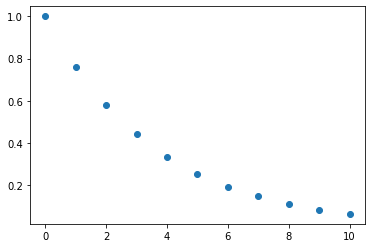

In [6]:
def cor(T, B, N):
    ans = np.array([0.0] * (N + 1))
    for j in range(N + 1):
        ans[j] = np.tanh(B/T)**j
    return ans

#ans[j] means ⟨𝑆0𝑆𝑗⟩ where 𝑗 = 0,1,⋯𝑁.
ans_ = cor(2, 2, 10)
plt.plot(ans_, 'o')

## Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.

In [7]:
def cor_plot(T, B, N):
    upper = int(N/2)
    ans = np.array([0.0] * upper)
    for j in range(upper):
        ans[j] = np.tanh(B/T)**j
    return ans

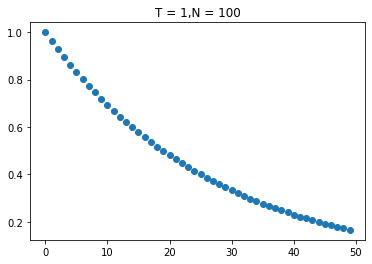

In [8]:
ans_ = cor_plot(1, 2, 100)
plt.title("T = 1,N = 100")
plt.plot(ans_, 'o')

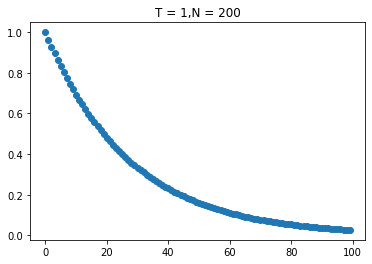

In [9]:
ans_ = cor_plot(1, 2, 200)
plt.title("T = 1,N = 200")
plt.plot(ans_, 'o')

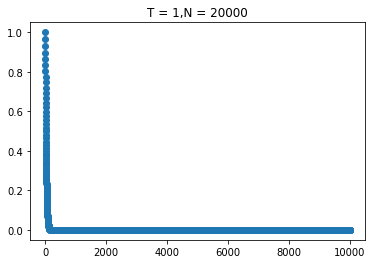

In [10]:
ans_ = cor_plot(1, 2, 20000)
plt.title("T = 1,N = 20000")
plt.plot(ans_, 'o')

### The lowest T is 1, The largest N may be very large, i can't confirm the exact number.